In [ ]:
%pip install matplotlib tensorflow

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1️⃣ Cargar dataset CIFAR-10
(x_train, y_train), (_, _) = cifar10.load_data()
print(f"Training samples: {x_train.shape[0]}, Image shape: {x_train.shape[1:]}")

Training samples: 50000, Image shape: (32, 32, 3)


In [3]:
# Seleccionamos una imagen de ejemplo (un coche, pájaro, etc.)
img = x_train[10]  # Cambia el índice para ver otras imágenes
x = np.expand_dims(img, axis=0)

In [4]:
# 2️⃣ Definir generador de aumentos
datagen = ImageDataGenerator(
    rotation_range=30,       # Rotación
    width_shift_range=0.2,   # Traslación horizontal
    height_shift_range=0.2,  # Traslación vertical
    shear_range=0.2,         # Shear
    zoom_range=0.2,          # Zoom
    horizontal_flip=True,    # Volteo horizontal
    brightness_range=[0.5, 1.5], # Brillo
    fill_mode='nearest'
)

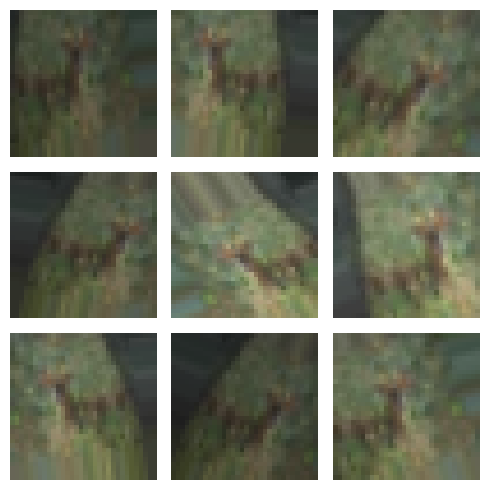

In [8]:
# 3️⃣ Generar imágenes aumentadas
fig, ax = plt.subplots(3, 3, figsize=(5, 5))
i = 0
for batch in datagen.flow(x, batch_size=1):
    ax[i // 3, i % 3].imshow(batch[0].astype("uint8"))
    ax[i // 3, i % 3].axis("off")
    i += 1
    if i == 9:  # Mostrar 9 ejemplos
        break

plt.tight_layout()
plt.show()